In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# de targetvariabele is de echte tijd tegenover de voorspelde tijd
df = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False)

In [3]:
df = df.drop(['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 
         'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 
         'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 
         'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 
         'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt', 
         'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
         'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum',
         'stm_mon_eind_tijd', 'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon',
         'stm_fact_jn', 'stm_akkoord_melding_jn', 'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd',
         'stm_rec_toegev_ddt', 'stm_hinderwaarde', 'stm_actie', 'stm_standplaats', 'stm_status_gebr',
         'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_schadenr',
         'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig', 'stm_relatiervo_volgend',
         'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd', 'stm_sorteerveld',
         'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
         'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt',
         'stm_x_vervallen_ind'], axis='columns')

In [4]:
df

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,...,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,...,09:00:00,0.0,1.000000e+08,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN
2,2,50053213,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,...,13:26:00,51.0,1.000000e+08,02/01/2006,13:26:00,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,...,17:20:00,40.0,1.000000e+08,02/01/2006,17:20:00,Persoon langs de baan,NaN,NaN,Hgl,NaN
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,...,22:36:00,6.0,1.000000e+08,02/01/2006,22:36:00,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898521,908625,99003505,0.0,NaN,11/05/2013 08:06:00,GVC : sp-2 en 3 stop lampen op de stootjukke...,GVC : sp-2 en 3 stop lampen op de stoot,560.0,560.0,NaN,...,09:29:00,83.0,5.900000e+01,11/05/2013,09:30:00,NaN,NaN,NaN,NaN,11/05/2013
898522,908626,99003506,0.0,NaN,11/05/2013 09:21:00,Whz : Ovw 100.1 albert Plesmanweg blijft dic...,Whz : Ovw 100.1 albert Plesmanweg blijft,468.0,468.0,10021085.0,...,10:44:00,83.0,4.700000e+01,11/05/2013,10:44:00,NaN,NaN,NaN,NaN,NaN
898523,908627,99003506,0.0,NaN,11/05/2013 09:21:00,Whz : Ovw 100.1 albert Plesmanweg blijft dic...,Whz : Ovw 100.1 albert Plesmanweg blijft,468.0,468.0,10021085.0,...,10:44:00,83.0,4.700000e+01,11/05/2013,10:44:00,NaN,NaN,NaN,NaN,00/00/0000
898524,908628,99999999,0.0,NaN,20/08/2016 14:15:17,Bdg-Apn : Km 12.7 twee gedode zwanen langs het...,Bdg-Apn : Km 12.7 twee gedode zwanen lan,102.0,102.0,NaN,...,15:14:00,19.0,1.060125e+09,20/08/2016,15:15:00,Gestoord object: SPOOR LA. Gestoord onde,NaN,NaN,NaN,NaN


In [5]:
data = df['stm_fh_duur']
data

0          NaN
1          0.0
2         51.0
3         40.0
4          6.0
          ... 
898521    83.0
898522    83.0
898523    83.0
898524    19.0
898525    19.0
Name: stm_fh_duur, Length: 898526, dtype: float64

In [6]:
data = data.dropna()
data = data.loc[data>0.0]
data

2         51.0
3         40.0
4          6.0
5          7.0
6         13.0
          ... 
898521    83.0
898522    83.0
898523    83.0
898524    19.0
898525    19.0
Name: stm_fh_duur, Length: 726775, dtype: float64

In [7]:
data.describe()

count    726775.000000
mean       1141.258427
std        7103.560208
min           1.000000
25%          54.000000
50%         120.000000
75%         378.000000
max      528297.000000
Name: stm_fh_duur, dtype: float64

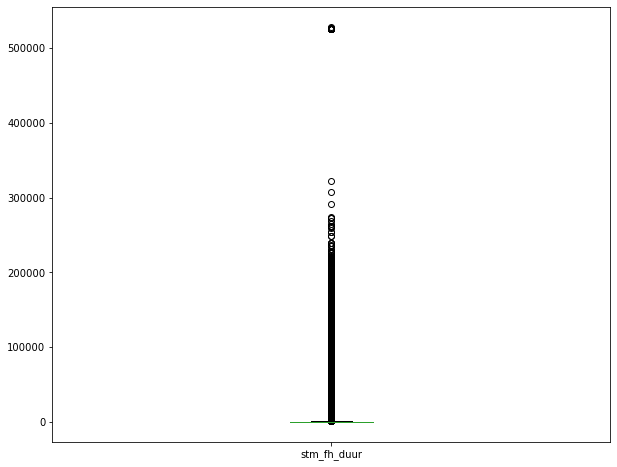

In [8]:
data.plot.box(figsize=(10, 8))

In [9]:
data = data.sort_values()

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
print(q1, q3, iqr)

zwakke_lower = data[(data<=q1-1.5*iqr)&(data>q1-3*iqr)].count()
sterke_lower = data[data<q1-3*iqr].count()
zwakke_upper = data[(data>=q3+1.5*iqr)&(data<q3+3*iqr)].count()
sterke_upper = data[data>q3+3*iqr].count()

print(len(data))
print()
print(sterke_upper)
print(zwakke_upper)
print(zwakke_lower)
print(sterke_lower)

54.0 378.0 324.0
726775

73187
43914
0
0


In [10]:
 data.mean()

1141.2584266107117

In [11]:
#np.sqrt(mean_squared_error(data, [data.mean()]))


#lijst = []
#for i in data:
#    lijst.append((i - (data.mean()))**2)
#RMSE = np.sqrt(sum(lijst)/len(lijst))
#RMSE

In [12]:
#data2 = data.sample(n=20000)
#data2 = data.copy()
#def fun1(x):
#    return (x - data.mean())**2
#
#data = data.apply(fun1)
#data

In [13]:
#np.sqrt(data.mean())

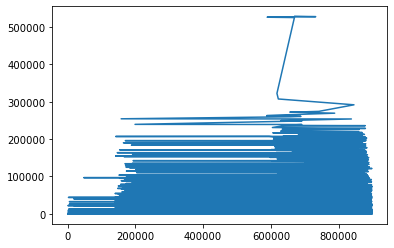

In [16]:
plt.plot(data)
plt.show()

In [22]:
len(data[data < data.mean()])

638074

In [23]:
len(data[data < data.mean()])/len(data)*100

87.79525988098105

Baseline: Alle hersteltijden duren korter dan 1141 minuten (+- 19 uur)
score: in 88% van de gevallen is de reparatietijd korter dan gemiddeld.